In [282]:
import pandas as pd
import os
import matplotlib.pyplot as mpl
import numpy as np
import seaborn as sns

os.chdir("/Users/margaretdemchak/Desktop/DA_401/NEA_grant_data")
boston_nea = pd.read_excel('Boston_grant.xlsx')
cbus_nea = pd.read_excel('Columbus_grant.xlsx')
dallas_nea = pd.read_excel('Dallas_grant.xlsx')
indy_nea = pd.read_excel('Indy_grant.xlsx')
nyc_nea = pd.read_excel('NYC_grant.xlsx')
sanfran_nea = pd.read_excel('SanFran_grant.xlsx')
#len(boston_nea)
boston_nea.head(5)

,Organization Name,Popular Name,Discipline / Field,Category,Application Number,City,State,Zip,Project Description,Fiscal Year,Congressional District,Grant Amount,Grant From Date,Grant To Date
0,"Artists for Humanity, Inc.",aka AFH,Visual Arts,Grants for Arts Projects,1895283-41-22,Boston,MA,02127-1112,Purpose: To support a painting and photography...,2022,8,20000.0,2022-06-01,2023-05-31
1,"Artists for Humanity, Inc.",aka AFH,Visual Arts,Grants for Arts Projects,1884032-41-21,Boston,MA,02127-1112,"To support a painting, photography, and video ...",2021,8,30000.0,2021-06-01,2022-05-31
2,"Artists for Humanity, Inc.",aka AFH,Visual Arts,Art Works,1861577-41-20,Boston,MA,02127-1112,"To support a painting, photography, and video ...",2020,8,25000.0,2020-06-01,2021-05-31
3,"Artists for Humanity, Inc.",aka AFH,Visual Arts,Art Works,1808125-41-18,Boston,MA,02127-1112,"To support a painting, photography, and video ...",2018,8,40000.0,2018-06-01,2019-05-31
4,"Artists for Humanity, Inc.",aka AFH,Visual Arts,Art Works,17-4100-7101,Boston,MA,02127-1112,"To support a painting, photography, and video ...",2017,8,25000.0,2017-07-01,2018-06-30


In [283]:
#for all city df '.0' from the year and grant amount
def tidy_dfs(dataframes):
    for df in dataframes:
        # Replace 
        df['Fiscal Year']=df['Fiscal Year'].astype(str).str.replace('.0', ' ', regex=False)
        df['Grant Amount']=df['Grant Amount'].astype(str).str.replace('.0', ' ', regex=False)
    return dataframes

boston_nea_tidy,cbus_nea_tidy, dallas_nea_tidy, indy_nea_tidy, nyc_nea_tidy, sanfran_nea_tidy = tidy_dfs([boston_nea,cbus_nea, dallas_nea, indy_nea, nyc_nea, sanfran_nea])


In [284]:
#Remove the rows that have no project description 
boston_nea_desript=boston_nea_tidy.dropna(subset=['Project Description']) #removed 3 rows out of 786
cbus_nea_desript=cbus_nea_tidy.dropna(subset=['Project Description']) #removed 2 rows out of 204
dallas_nea_desript=dallas_nea_tidy.dropna(subset=['Project Description']) #removed 1 row out of 309
indy_nea_desript=indy_nea_tidy.dropna(subset=['Project Description']) #removed 2 rows out of 244
nyc_nea_desript=nyc_nea_tidy.dropna(subset=['Project Description']) #removed 65 rows out of 7939
sanfran_nea_desript=sanfran_nea_tidy.dropna(subset=['Project Description']) #removed 21 rows out of 2318

In [285]:
def descript_to_list(dataframes):
    project_desc_lists = []
    for df in dataframes:
        project_desc_lists.append(df['Project Description'].tolist())
    return project_desc_lists
        
boston_descript_list,cbus_descript_list, dallas_descript_list,indy_descript_list,nyc_descript_list,sanfran_descript_list = descript_to_list([boston_nea_desript,cbus_nea_desript, dallas_nea_desript,indy_nea_desript,nyc_nea_desript,sanfran_nea_desript])


In [286]:
from sklearn.feature_extraction.text import  TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/margaretdemchak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [287]:
#create an instance to tokenize the text and apply the TF-IDF transformation
#def get_transformed_docs(lists):
    #vectorizer = TfidfVectorizer(max_df=.95,
                               #  min_df=3, 
                               #  stop_words=stopwords.words('english'), 
                              #   use_idf=True, 
                              #   norm='l2')
    #transformed_docs_list = []
   # for description_list in lists:
    #    transformed_docs = vectorizer.fit_transform(description_list)
    #    transformed_docs_list.append(transformed_docs)
   # return transformed_docs_list

#boston_tfidf_transformed,cbus_tfidf_transformed, dallas_tfidf_transformed,indy_tfidf_transformed,nyc_tfidf_transformed,sanfran_tfidf_transformed=get_transformed_docs([boston_descript_list,cbus_descript_list, dallas_descript_list,indy_descript_list,nyc_descript_list,sanfran_descript_list])


In [288]:
#def get_transformed_docs(lists):
    #vectorizer = TfidfVectorizer(max_df=.95,
                 #                min_df=3, 
                 #                stop_words=stopwords.words('english'), 
                 #                use_idf=True, 
                  #               norm='l2')
    #transformed_docs_list = []
    #for description_list in lists:
     #   transformed_docs = vectorizer.fit_transform(description_list)
     #   transformed_docs_list.append(transformed_docs)
   # return transformed_docs_list


In [289]:
#Use scikit-learn's TfidfVectorizer class to set up a sparse matrix of TF-IDF features
boston_vectorizer = TfidfVectorizer(max_df=.95,
                             min_df=1, 
                             stop_words=stopwords.words('english'), 
                             use_idf=True, 
                             norm='l2')
boston_tfidf_transformed = boston_vectorizer.fit_transform(boston_descript_list)
len(boston_vectorizer.get_feature_names())

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


4531

In [290]:
cbus_vectorizer = TfidfVectorizer(max_df=.95,
                             min_df=1, 
                             stop_words=stopwords.words('english'), 
                             use_idf=True, 
                             norm='l2')
cbus_tfidf_transformed = cbus_vectorizer.fit_transform(cbus_descript_list)
len(cbus_vectorizer.get_feature_names())

1865

In [291]:
dallas_vectorizer = TfidfVectorizer(max_df=.95,
                             min_df=1, 
                             stop_words=stopwords.words('english'), 
                             use_idf=True, 
                             norm='l2')
dallas_tfidf_transformed = dallas_vectorizer.fit_transform(dallas_descript_list)
len(dallas_vectorizer.get_feature_names())

3159

In [292]:
indy_vectorizer = TfidfVectorizer(max_df=.95,
                             min_df=1, 
                             stop_words=stopwords.words('english'), 
                             use_idf=True, 
                             norm='l2')
indy_tfidf_transformed = indy_vectorizer.fit_transform(indy_descript_list)
len(indy_vectorizer.get_feature_names())

2263

In [293]:
nyc_vectorizer = TfidfVectorizer(max_df=.95,
                             min_df=1, 
                             stop_words=stopwords.words('english'), 
                             use_idf=True, 
                             norm='l2')
nyc_tfidf_transformed = nyc_vectorizer.fit_transform(nyc_descript_list)
len(nyc_vectorizer.get_feature_names())

17001

In [294]:
sanfran_vectorizer = TfidfVectorizer(max_df=.95,
                             min_df=1, 
                             stop_words=stopwords.words('english'), 
                             use_idf=True, 
                             norm='l2')
sanfran_tfidf_transformed = sanfran_vectorizer.fit_transform(sanfran_descript_list)
len(sanfran_vectorizer.get_feature_names())

9022

In [295]:
boston_transformed_as_array = boston_tfidf_transformed.toarray()
cbus_transformed_as_array = cbus_tfidf_transformed.toarray()
dallas_transformed_as_array = dallas_tfidf_transformed.toarray()
indy_transformed_as_array = indy_tfidf_transformed.toarray()
nyc_transformed_as_array =nyc_tfidf_transformed.toarray()
sanfran_transformed_as_array = sanfran_tfidf_transformed.toarray()

In [296]:
#def get_tfidf_dataframes(transformed_docs_list):
    #all_dfs = []
    #for doc in transformed_docs_list:
        #feature_names = vectorizer.get_feature_names()
        #tf_idf_tuples = []
        #for counter, doc in enumerate(transformed_documents_as_array):
          #  tf_idf_tuples.append(list(zip(feature_names, doc)))
           # one_doc_as_df = pd.DataFrame([item for sublist in tf_idf_tuples for item in sublist], columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)
           # all_dfs.append(one_doc_as_df)
    #return all_dfs

In [297]:
#boston, cbus, dallas= get_tfidf_dataframes([boston_transformed_as_array,cbus_transformed_as_array, dallas_transformed_as_array])

In [298]:
boston_tfidf_df=[]
for counter, doc in enumerate(boston_transformed_as_array): #loop each item in transformed_documents_as_array, using enumerate to keep track of the current position
    # construct a dataframe
    tf_idf_tuples = list(zip(boston_vectorizer.get_feature_names(), doc)) #uses tuples
    one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples,columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)
    boston_tfidf_df.append(one_doc_as_df)
    
#boston_tfidf_df[1]

In [299]:
cbus_tfidf_df=[]
for counter, doc in enumerate(cbus_transformed_as_array): #loop each item in transformed_documents_as_array, using enumerate to keep track of the current position
    # construct a dataframe
    tf_idf_tuples = list(zip(cbus_vectorizer.get_feature_names(), doc)) #uses tuples
    one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples,columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)
    cbus_tfidf_df.append(one_doc_as_df)
#cbus_tfidf_df[1]

In [300]:
dallas_tfidf_df=[]
for counter, doc in enumerate(dallas_transformed_as_array): #loop each item in transformed_documents_as_array, using enumerate to keep track of the current position
    # construct a dataframe
    tf_idf_tuples = list(zip(dallas_vectorizer.get_feature_names(), doc)) #uses tuples
    one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples,columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)
    dallas_tfidf_df.append(one_doc_as_df)
    
#dallas_tfidf_df[1]

In [301]:
indy_tfidf_df=[]
for counter, doc in enumerate(indy_transformed_as_array): #loop each item in transformed_documents_as_array, using enumerate to keep track of the current position
    # construct a dataframe
    tf_idf_tuples = list(zip(indy_vectorizer.get_feature_names(), doc)) #uses tuples
    one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples,columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)
    indy_tfidf_df.append(one_doc_as_df)
    
#indy_tfidf_df[1]

In [302]:
nyc_tfidf_df=[]
for counter, doc in enumerate(nyc_transformed_as_array): #loop each item in transformed_documents_as_array, using enumerate to keep track of the current position
    # construct a dataframe
    tf_idf_tuples = list(zip(nyc_vectorizer.get_feature_names(), doc)) #uses tuples
    one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples,columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)
    nyc_tfidf_df.append(one_doc_as_df)
    
#nyc_tfidf_df[1]

In [303]:
sanfran_tfidf_df=[]
for counter, doc in enumerate(sanfran_transformed_as_array): #loop each item in transformed_documents_as_array, using enumerate to keep track of the current position
    # construct a dataframe
    tf_idf_tuples = list(zip(sanfran_vectorizer.get_feature_names(), doc)) #uses tuples
    one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples,columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)
    sanfran_tfidf_df.append(one_doc_as_df)
    
#sanfran_tfidf_df[1]

In [304]:
#all_dfs=[]
#for counter, doc in enumerate(transformed_documents_as_array): #loop each item in transformed_documents_as_array, using enumerate to keep track of the current position
    # construct a dataframe
   # tf_idf_tuples = list(zip(vectorizer.get_feature_names(), doc)) #uses tuples
    #one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples,columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)
    #all_dfs.append(one_doc_as_df)
    
#all_dfs[1] 

In [305]:
#keys= ['mural', 'sculpture', 'community', 'engagement', 'outdoor', 'public', 'communities', 'park']
#tfidf_all = {}
#for key in keys:
    #tfidf_all[key]=[]

#for key in keys:
    #for i in all_dfs:
        #this_score=i.loc[i['term']==key]['score'].iloc[0]
        #tfidf_all[key].append(this_score)
        
#for key in keys:
    #boston_nea_desript_nans[key]=tfidf_all[key]
    
#boston_nea_desript_nans.head(5)

In [306]:
keys= ['mural', 'sculpture', 'community', 'outdoor', 'public', 'communities', 'park']
tfidf_all = {}
for key in keys:
    tfidf_all[key]=[]

for key in keys:
    for df in boston_tfidf_df:
        this_score=df.loc[df['term']==key]['score'].iloc[0]
        tfidf_all[key].append(this_score)
        
for key in keys:
    boston_nea_desript[key]=tfidf_all[key]
    
boston_nea_desript.head(2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":


,Organization Name,Popular Name,Discipline / Field,Category,Application Number,City,State,Zip,Project Description,Fiscal Year,...,Grant Amount,Grant From Date,Grant To Date,mural,sculpture,community,outdoor,public,communities,park
0,"Artists for Humanity, Inc.",aka AFH,Visual Arts,Grants for Arts Projects,1895283-41-22,Boston,MA,02127-1112,Purpose: To support a painting and photography...,2022,...,20000,2022-06-01,2023-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Artists for Humanity, Inc.",aka AFH,Visual Arts,Grants for Arts Projects,1884032-41-21,Boston,MA,02127-1112,"To support a painting, photography, and video ...",2021,...,30000,2021-06-01,2022-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [307]:
keys= ['mural', 'sculpture', 'community', 'outdoor', 'public', 'communities', 'park']

tfidf_all = {}
for key in keys:
    tfidf_all[key]=[]

for key in keys:
    for df in cbus_tfidf_df:
            this_score=df.loc[df['term']==key]['score'].iloc[0]
            tfidf_all[key].append(this_score)
        
for key in keys:
    cbus_nea_desript[key]=tfidf_all[key]
    
cbus_nea_desript.head(2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,Organization Name,Popular Name,Discipline / Field,Category,Application Number,City,State,Zip,Project Description,Fiscal Year,...,Grant Amount,Grant From Date,Grant To Date,mural,sculpture,community,outdoor,public,communities,park
0,Arts Foundation of Olde Towne,NaN,Challenge America,Challenge America Community Arts Development,02-7816-1439,Columbus,OH,43215-3978,To support a Community Arts Development projec...,2002,...,10000,2002-09-01,2003-08-31,0.0,0.0,0.309521,0.0,0.0,0.0,0.0
1,Arts Foundation of Olde Towne,NaN,Challenge America,Challenge America Community Arts Development,01-7816-1370,Columbus,OH,43215-3978,To support a Community Arts Development projec...,2001,...,10000,2001-09-01,2002-08-31,0.0,0.0,0.682322,0.0,0.0,0.0,0.0


In [308]:
keys= ['sculpture', 'community', 'outdoor', 'public', 'communities', 'park']
tfidf_all = {}
for key in keys:
    tfidf_all[key]=[]

for key in keys:
    for df in dallas_tfidf_df:
        this_score=df.loc[df['term']==key]['score'].iloc[0]
        tfidf_all[key].append(this_score)
        
for key in keys:
    dallas_nea_desript[key]=tfidf_all[key]
    
dallas_nea_desript.head(2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":


,Organization Name,Popular Name,Discipline / Field,Category,Application Number,City,State,Zip,Project Description,Fiscal Year,Congressional District,Grant Amount,Grant From Date,Grant To Date,sculpture,community,outdoor,public,communities,park
0,29 PIECES,NaN,Visual Arts,Art Works,17-4100-7129,Dallas,TX,75214-3348,To support the creation of a public art work i...,2017,32,10000,2017-06-01,2019-07-31,0.0,0.0,0.0,0.180453,0.0,0.0
1,"Artist Outreach, The",NaN,Challenge America,Challenge America,1909473-78-23,DALLAS,TX,75231-4180,Purpose: To support an interactive arts and sc...,2023,32,10000,2023-01-01,2023-05-31,0.0,0.0,0.0,0.000000,0.0,0.0


In [309]:
keys= ['mural', 'sculpture', 'community', 'outdoor', 'public', 'communities', 'park']
tfidf_all = {}
for key in keys:
    tfidf_all[key]=[]

for key in keys:
    for df in indy_tfidf_df:
        this_score=df.loc[df['term']==key]['score'].iloc[0]
        tfidf_all[key].append(this_score)
        
for key in keys:
    indy_nea_desript[key]=tfidf_all[key]
    
indy_nea_desript.head(2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":


,Organization Name,Popular Name,Discipline / Field,Category,Application Number,City,State,Zip,Project Description,Fiscal Year,...,Grant Amount,Grant From Date,Grant To Date,mural,sculpture,community,outdoor,public,communities,park
0,"American Pianists Association, Inc.",NaN,Music,Art Works,16-3100-7155,INDIANAPOLIS,IN,46208-3443,To support the outreach concerts and workshops...,2016,...,10000,2016-07-01,2017-04-30,0.0,0.0,0.000000,0.0,0.193002,0.0,0.0
1,"American Pianists Association, Inc.",NaN,Music,Art Works,14-3100-7171,INDIANAPOLIS,IN,46208-3443,To support the Concerto Curriculum arts educat...,2014,...,10000,2014-06-01,2015-03-31,0.0,0.0,0.078236,0.0,0.094481,0.0,0.0


In [310]:
keys= ['mural', 'sculpture', 'community', 'outdoor', 'public', 'communities', 'park']
tfidf_all = {}
for key in keys:
    tfidf_all[key]=[]

for key in keys:
    for df in nyc_tfidf_df:
        this_score=df.loc[df['term']==key]['score'].iloc[0]
        tfidf_all[key].append(this_score)
        
for key in keys:
    nyc_nea_desript[key]=tfidf_all[key]
    
nyc_nea_desript.head(2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":


,Organization Name,Popular Name,Discipline / Field,Category,Application Number,City,State,Zip,Project Description,Fiscal Year,...,Grant Amount,Grant From Date,Grant To Date,mural,sculpture,community,outdoor,public,communities,park
0,"3-Legged Dog, Inc",aka 3LD,Presenting & Multidisciplinary Works,Art Works,12-5400-7081,NEW YORK,NY,10006-2206,To support 3LD/3D+. This program provides reso...,2012,...,20000,2012-06-01,2015-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"3-Legged Dog, Inc",aka 3LD,Presenting & Multidisciplinary Works,Access to Artistic Excellence,10-5400-7130,NEW YORK,NY,10006-2206,To support the Cooperative Professional Resour...,2010,...,15000,2010-07-01,2012-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [311]:
keys= ['mural', 'sculpture', 'community', 'engagement', 'outdoor', 'public', 'communities', 'park']
tfidf_all = {}
for key in keys:
    tfidf_all[key]=[]

for key in keys:
    for df in sanfran_tfidf_df:
        this_score=df.loc[df['term']==key]['score'].iloc[0]
        tfidf_all[key].append(this_score)
        
for key in keys:
    sanfran_nea_desript[key]=tfidf_all[key]
    
sanfran_nea_desript.head(2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":


,Organization Name,Popular Name,Discipline / Field,Category,Application Number,City,State,Zip,Project Description,Fiscal Year,...,Grant From Date,Grant To Date,mural,sculpture,community,engagement,outdoor,public,communities,park
0,3rd I South Asian Independent Film,aka 3rd i Films,Media Arts,Grants for Arts Projects,1904919-34-23,SAN FRANCISCO,CA,94110-2322,Purpose: To support 3rd i Films' San Francisco...,2023,...,2023-01-01,2023-12-31,0.0,0.0,0.0,0.0,0.0,0.137230,0.184247,0.0
1,3rd I South Asian Independent Film,aka 3rd i Films,Media Arts,Grants for Arts Projects,1888103-34-22,SAN FRANCISCO,CA,94110-2322,Purpose: To support 3rd i Films' San Francisco...,2022,...,2022-01-01,2022-12-31,0.0,0.0,0.0,0.0,0.0,0.139807,0.187707,0.0


In [312]:
#corr_matrix = boston_nea_desript_nans.corr().abs()
#corr_matrix.drop(columns=['Congressional District'])

In [313]:
#sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  #.stack()
                  #.sort_values(ascending=False))

#corrdf = sol.to_frame()
#corrdf.rename(columns = {0:'Corr_coefficient'}, inplace = True)
#corrdf.sort_values(by = "Corr_coefficient", ascending = False)

In [314]:
#renaming datasets
boston_nea_public = boston_nea_desript
cbus_nea_public = cbus_nea_desript
dallas_nea_public = dallas_nea_desript
indy_nea_public = indy_nea_desript
nyc_nea_public = nyc_nea_desript
sanfran_nea_public = sanfran_nea_desript

# boston_nea_public['is_public_art'] = ((boston_nea_public['mural'] > 0) | (boston_nea_public['sculpture'] > 0) | 
                                      (boston_nea_public['community'] > 0)| 
                                      (boston_nea_public['outdoor'] > 0)| (boston_nea_public['public'] > 0)| 
                                      (boston_nea_public['communities'] > 0)| (boston_nea_public['park'] > 0)).astype(int)
boston_nea_public.head(2)


In [316]:
cbus_nea_public['is_public_art'] = ((cbus_nea_public['mural'] > 0) | (cbus_nea_public['sculpture'] > 0) | 
                                      (cbus_nea_public['community'] > 0)| 
                                      (cbus_nea_public['outdoor'] > 0)| (cbus_nea_public['public'] > 0)| 
                                      (cbus_nea_public['communities'] > 0)| (cbus_nea_public['park'] > 0)).astype(int)
cbus_nea_public.head(2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Organization Name,Popular Name,Discipline / Field,Category,Application Number,City,State,Zip,Project Description,Fiscal Year,...,Grant From Date,Grant To Date,mural,sculpture,community,outdoor,public,communities,park,is_public_art
0,Arts Foundation of Olde Towne,NaN,Challenge America,Challenge America Community Arts Development,02-7816-1439,Columbus,OH,43215-3978,To support a Community Arts Development projec...,2002,...,2002-09-01,2003-08-31,0.0,0.0,0.309521,0.0,0.0,0.0,0.0,1
1,Arts Foundation of Olde Towne,NaN,Challenge America,Challenge America Community Arts Development,01-7816-1370,Columbus,OH,43215-3978,To support a Community Arts Development projec...,2001,...,2001-09-01,2002-08-31,0.0,0.0,0.682322,0.0,0.0,0.0,0.0,1


In [318]:
dallas_nea_public['is_public_art'] = ((dallas_nea_public['sculpture'] > 0) | 
                                      (dallas_nea_public['community'] > 0)| 
                                      (dallas_nea_public['outdoor'] > 0)| (dallas_nea_public['public'] > 0)|
                                      (dallas_nea_public['communities'] > 0)| (dallas_nea_public['park'] > 0)).astype(int)
dallas_nea_public.head(2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Organization Name,Popular Name,Discipline / Field,Category,Application Number,City,State,Zip,Project Description,Fiscal Year,...,Grant Amount,Grant From Date,Grant To Date,sculpture,community,outdoor,public,communities,park,is_public_art
0,29 PIECES,NaN,Visual Arts,Art Works,17-4100-7129,Dallas,TX,75214-3348,To support the creation of a public art work i...,2017,...,10000,2017-06-01,2019-07-31,0.0,0.0,0.0,0.180453,0.0,0.0,1
1,"Artist Outreach, The",NaN,Challenge America,Challenge America,1909473-78-23,DALLAS,TX,75231-4180,Purpose: To support an interactive arts and sc...,2023,...,10000,2023-01-01,2023-05-31,0.0,0.0,0.0,0.000000,0.0,0.0,0


In [319]:
indy_nea_public['is_public_art'] = ((indy_nea_public['mural'] > 0) | (indy_nea_public['sculpture'] > 0) | 
                                      (indy_nea_public['community'] > 0)| 
                                      (indy_nea_public['outdoor'] > 0)| (indy_nea_public['public'] > 0)| 
                                      (indy_nea_public['communities'] > 0)| (indy_nea_public['park'] > 0)).astype(int)
indy_nea_public.head(2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Organization Name,Popular Name,Discipline / Field,Category,Application Number,City,State,Zip,Project Description,Fiscal Year,...,Grant From Date,Grant To Date,mural,sculpture,community,outdoor,public,communities,park,is_public_art
0,"American Pianists Association, Inc.",NaN,Music,Art Works,16-3100-7155,INDIANAPOLIS,IN,46208-3443,To support the outreach concerts and workshops...,2016,...,2016-07-01,2017-04-30,0.0,0.0,0.000000,0.0,0.193002,0.0,0.0,1
1,"American Pianists Association, Inc.",NaN,Music,Art Works,14-3100-7171,INDIANAPOLIS,IN,46208-3443,To support the Concerto Curriculum arts educat...,2014,...,2014-06-01,2015-03-31,0.0,0.0,0.078236,0.0,0.094481,0.0,0.0,1


In [320]:
nyc_nea_public['is_public_art'] = ((nyc_nea_public['mural'] > 0) | (nyc_nea_public['sculpture'] > 0) | 
                                      (nyc_nea_public['community'] > 0)| 
                                      (nyc_nea_public['outdoor'] > 0)| (nyc_nea_public['public'] > 0)| 
                                      (nyc_nea_public['communities'] > 0)| (nyc_nea_public['park'] > 0)).astype(int)
nyc_nea_public.head(2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Organization Name,Popular Name,Discipline / Field,Category,Application Number,City,State,Zip,Project Description,Fiscal Year,...,Grant From Date,Grant To Date,mural,sculpture,community,outdoor,public,communities,park,is_public_art
0,"3-Legged Dog, Inc",aka 3LD,Presenting & Multidisciplinary Works,Art Works,12-5400-7081,NEW YORK,NY,10006-2206,To support 3LD/3D+. This program provides reso...,2012,...,2012-06-01,2015-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,"3-Legged Dog, Inc",aka 3LD,Presenting & Multidisciplinary Works,Access to Artistic Excellence,10-5400-7130,NEW YORK,NY,10006-2206,To support the Cooperative Professional Resour...,2010,...,2010-07-01,2012-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [321]:
sanfran_nea_public['is_public_art'] = ((sanfran_nea_public['mural'] > 0) | (sanfran_nea_public['sculpture'] > 0) | 
                                      (sanfran_nea_public['community'] > 0)| 
                                      (sanfran_nea_public['outdoor'] > 0)| (sanfran_nea_public['public'] > 0)| 
                                      (sanfran_nea_public['communities'] > 0)| (sanfran_nea_public['park'] > 0)).astype(int)
sanfran_nea_public.head(2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Organization Name,Popular Name,Discipline / Field,Category,Application Number,City,State,Zip,Project Description,Fiscal Year,...,Grant To Date,mural,sculpture,community,engagement,outdoor,public,communities,park,is_public_art
0,3rd I South Asian Independent Film,aka 3rd i Films,Media Arts,Grants for Arts Projects,1904919-34-23,SAN FRANCISCO,CA,94110-2322,Purpose: To support 3rd i Films' San Francisco...,2023,...,2023-12-31,0.0,0.0,0.0,0.0,0.0,0.137230,0.184247,0.0,1
1,3rd I South Asian Independent Film,aka 3rd i Films,Media Arts,Grants for Arts Projects,1888103-34-22,SAN FRANCISCO,CA,94110-2322,Purpose: To support 3rd i Films' San Francisco...,2022,...,2022-12-31,0.0,0.0,0.0,0.0,0.0,0.139807,0.187707,0.0,1


In [323]:
boston_nea_public.to_csv('boston_nea_public_keyword.csv')
cbus_nea_public.to_csv('cbus_nea_public_keyword.csv')
dallas_nea_public.to_csv('dallas_nea_public_keyword.csv')
indy_nea_public.to_csv('indy_nea_public_keyword.csv')
nyc_nea_public.to_csv('nyc_nea_public_keyword.csv')
sanfran_nea_public.to_csv('sanfran_nea_public_keyword.csv')

In [324]:
from sklearn.model_selection import train_test_split

x_boston = boston_nea_public[['Grant Amount']]
y_boston = boston_nea_public['is_public_art']

X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(x_boston, 
                                                    y_boston, 
                                                    test_size=0.33, 
                                                    random_state=11)

In [325]:
x_cbus = cbus_nea_public[['Grant Amount']]
y_cbus = cbus_nea_public['is_public_art']

X_train_cbus, X_test_cbus, y_train_cbus, y_test_cbus = train_test_split(x_cbus, 
                                                    y_cbus, 
                                                    test_size=0.33, 
                                                    random_state=11)

In [326]:
x_dallas = dallas_nea_public[['Grant Amount']]
y_dallas = dallas_nea_public['is_public_art']

X_train_dallas, X_test_dallas, y_train_dallas, y_test_dallas = train_test_split(x_dallas, 
                                                    y_dallas, 
                                                    test_size=0.33, 
                                                    random_state=11)

In [327]:
x_indy = indy_nea_public[['Grant Amount']]
y_indy = indy_nea_public['is_public_art']

X_train_indy, X_test_indy, y_train_indy, y_test_indy = train_test_split(x_indy, 
                                                    y_indy, 
                                                    test_size=0.33, 
                                                    random_state=11)

In [328]:
x_nyc = nyc_nea_public[['Grant Amount']]
y_nyc = nyc_nea_public['is_public_art']

X_train_nyc, X_test_nyc, y_train_nyc, y_test_nyc = train_test_split(x_nyc, 
                                                    y_nyc, 
                                                    test_size=0.33, 
                                                    random_state=11)

In [329]:
x_sanfran = sanfran_nea_public[['Grant Amount']]
y_sanfran = sanfran_nea_public['is_public_art']

X_train_sanfran, X_test_sanfran, y_train_sanfran, y_test_sanfran = train_test_split(x_sanfran, 
                                                    y_sanfran, 
                                                    test_size=0.33, 
                                                    random_state=11)

In [330]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(class_weight='balanced')

log_boston_train=log_reg.fit(X_train_boston, y_train_boston)
predict_boston = log_boston_train.predict(X_test_boston)
boston_score = log_boston_train.score(X_test_boston,y_test_boston)

In [331]:
boston_score

0.6872586872586872

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


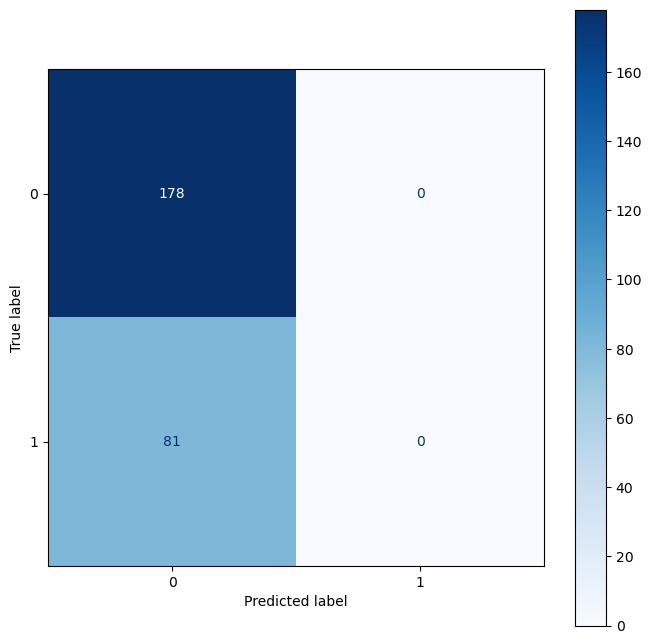

In [332]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = mpl.subplots(figsize=(8, 8)) 
plot_confusion_matrix(log_boston_train, X_test_boston, y_test_boston, cmap='Blues', ax=ax)  
mpl.show()

In [333]:
from sklearn.metrics import precision_score
precision_score(y_test_boston, predict_boston, average=None)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.68725869, 0.        ])

In [334]:
from sklearn.metrics import recall_score
recall_score(y_test_boston, predict_boston, average=None)

array([1., 0.])

In [335]:
from sklearn.metrics import f1_score
f1_score(y_test_boston, predict_boston, average=None)

array([0.81464531, 0.        ])

In [336]:
log_boston_train.intercept_

array([4.69512303e-11])

In [337]:
log_boston_train.coef_

array([[-2.30842793e-06]])

In [338]:
log_cbus_train=log_reg.fit(X_train_cbus, y_train_cbus)
predict_cbus = log_cbus_train.predict(X_test_cbus)
cbus_score = log_cbus_train.score(X_test_cbus,y_test_cbus)
cbus_score

0.7313432835820896

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


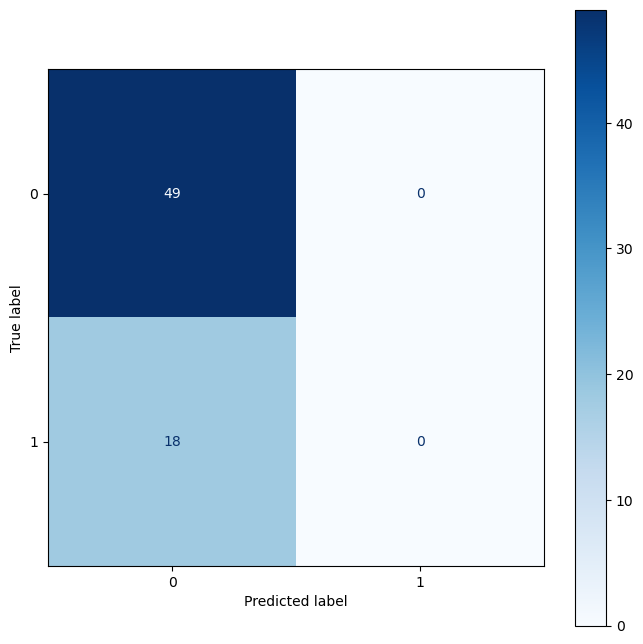

In [339]:
fig, ax = mpl.subplots(figsize=(8, 8))
plot_confusion_matrix(log_cbus_train, X_test_cbus, y_test_cbus, cmap='Blues', ax=ax)  
mpl.show()

In [340]:
precision_score(y_test_cbus, predict_cbus, average=None)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.73134328, 0.        ])

In [341]:
recall_score(y_test_cbus, predict_cbus, average=None)

array([1., 0.])

In [342]:
f1_score(y_test_cbus, predict_cbus, average=None)

array([0.84482759, 0.        ])

In [343]:
log_cbus_train.intercept_

array([1.60643768e-11])

In [344]:
log_cbus_train.coef_

array([[-1.5466589e-06]])

In [345]:
log_dallas_train=log_reg.fit(X_train_dallas, y_train_dallas)
predict_dallas = log_dallas_train.predict(X_test_dallas)
dallas_score = log_dallas_train.score(X_test_dallas,y_test_dallas)
dallas_score

0.3137254901960784

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


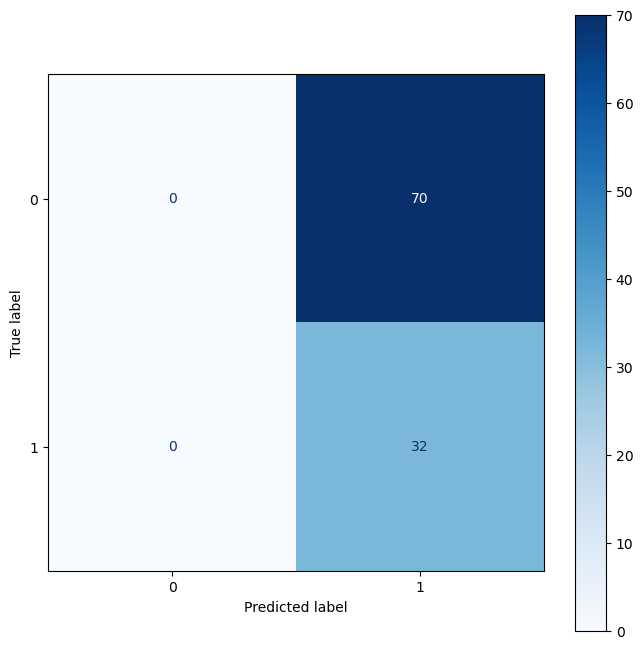

In [346]:
fig, ax = mpl.subplots(figsize=(8, 8))
plot_confusion_matrix(log_dallas_train, X_test_dallas, y_test_dallas, cmap='Blues', ax=ax)  
mpl.show()

In [347]:
precision_score(y_test_dallas, predict_dallas, average=None)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.        , 0.31372549])

In [348]:
recall_score(y_test_dallas, predict_dallas, average=None)

array([0., 1.])

In [349]:
f1_score(y_test_dallas, predict_dallas, average=None)

array([0.        , 0.47761194])

In [350]:
log_dallas_train.intercept_

array([-1.92072612e-10])

In [351]:
log_dallas_train.coef_

array([[3.94961402e-06]])

In [352]:
log_indy_train=log_reg.fit(X_train_indy, y_train_indy)
predict_indy = log_indy_train.predict(X_test_indy)
indy_score = log_indy_train.score(X_test_indy,y_test_indy)
indy_score

0.6

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


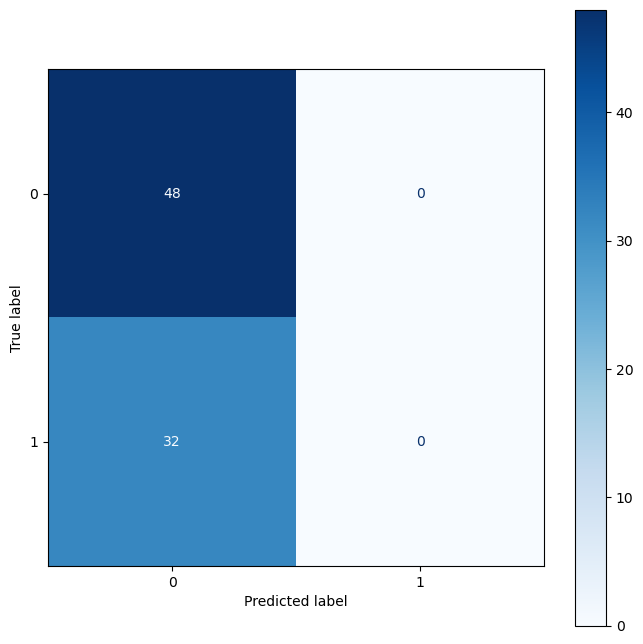

In [353]:
fig, ax = mpl.subplots(figsize=(8, 8))
plot_confusion_matrix(log_indy_train, X_test_indy, y_test_indy, cmap='Blues', ax=ax)  
mpl.show()

In [354]:
precision_score(y_test_indy, predict_indy, average=None)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.6, 0. ])

In [355]:
recall_score(y_test_indy, predict_indy, average=None)

array([1., 0.])

In [356]:
f1_score(y_test_indy, predict_indy, average=None)

array([0.75, 0.  ])

In [357]:
log_indy_train.intercept_

array([7.47539068e-11])

In [358]:
log_indy_train.coef_

array([[-2.62749681e-06]])

In [359]:
log_nyc_train=log_reg.fit(X_train_nyc, y_train_nyc)
predict_nyc = log_nyc_train.predict(X_test_nyc)
nyc_score = log_nyc_train.score(X_test_nyc,y_test_nyc)
nyc_score

0.7141208156983455

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


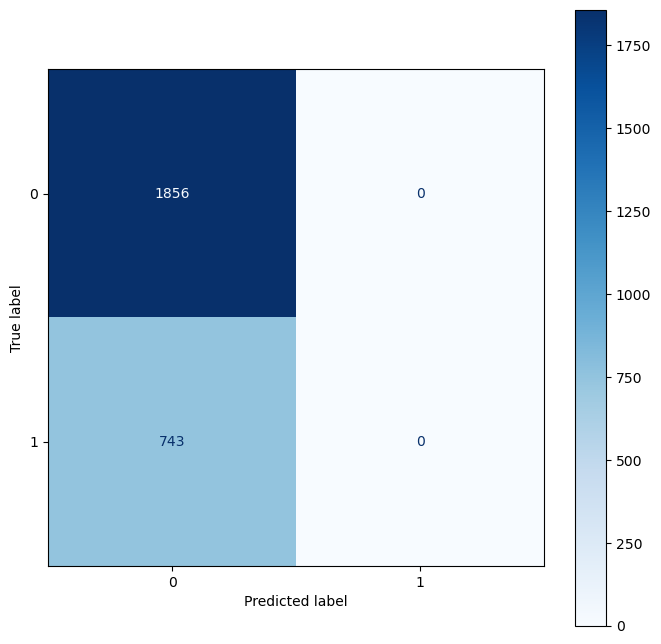

In [360]:
fig, ax = mpl.subplots(figsize=(8, 8))
plot_confusion_matrix(log_nyc_train, X_test_nyc, y_test_nyc, cmap='Blues', ax=ax)  
mpl.show()

In [361]:
precision_score(y_test_nyc, predict_nyc, average=None)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.71412082, 0.        ])

In [362]:
recall_score(y_test_nyc, predict_nyc, average=None)

array([1., 0.])

In [363]:
f1_score(y_test_nyc, predict_nyc, average=None)

array([0.8332211, 0.       ])

In [364]:
log_nyc_train.intercept_

array([9.27774726e-12])

In [365]:
log_nyc_train.coef_

array([[-3.6751413e-07]])

In [366]:
log_sanfran_train=log_reg.fit(X_train_sanfran, y_train_sanfran)
predict_sanfran = log_sanfran_train.predict(X_test_sanfran)
sanfran_score = log_sanfran_train.score(X_test_sanfran,y_test_sanfran)
sanfran_score

0.31357048748353095

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


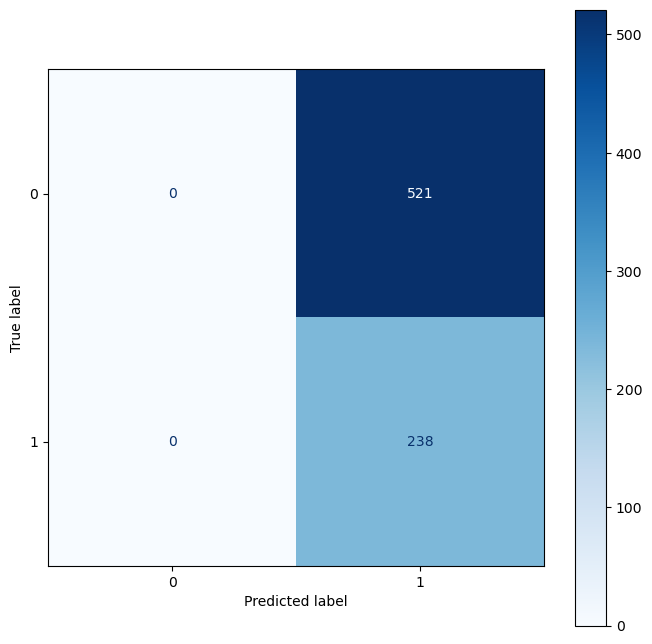

In [367]:
fig, ax = mpl.subplots(figsize=(8, 8))
plot_confusion_matrix(log_sanfran_train, X_test_sanfran, y_test_sanfran, cmap='Blues', ax=ax)  
mpl.show()

In [368]:
precision_score(y_test_sanfran, predict_sanfran, average=None)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.        , 0.31357049])

In [369]:
recall_score(y_test_sanfran, predict_sanfran, average=None)

array([0., 1.])

In [370]:
f1_score(y_test_sanfran, predict_sanfran, average=None)

array([0.       , 0.4774323])

In [371]:
log_sanfran_train.intercept_

array([-3.79227929e-10])

In [372]:
log_sanfran_train.coef_

array([[4.46165674e-06]])